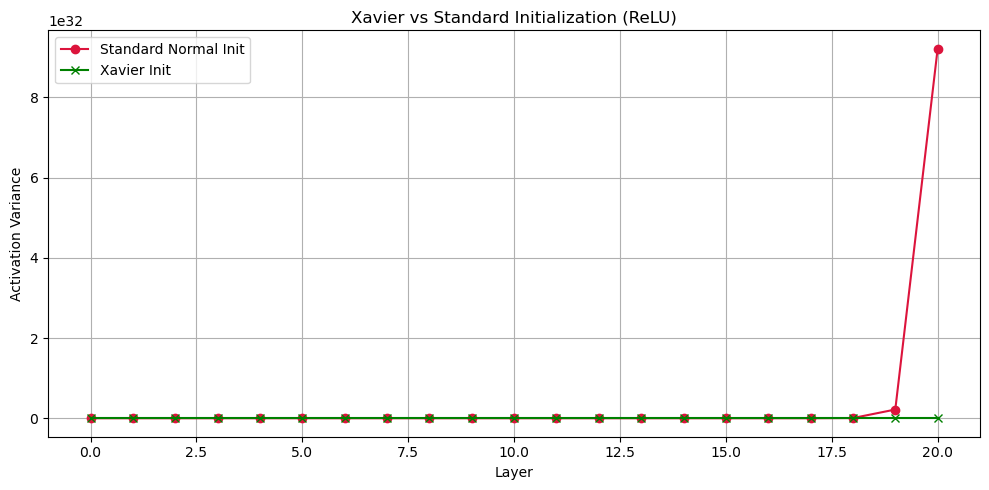

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU activation
def relu(x):
    return np.maximum(0, x)

# Settings
np.random.seed(42)
input_data = np.random.randn(1000, 100)  # 1000 samples, 100 features
num_layers = 20
layer_size = 100

# Containers for activation variances
activations_std = [input_data]
activations_xavier = [input_data]

# Forward pass - Standard Normal Initialization
x = input_data.copy()
for _ in range(num_layers):
    w = np.random.randn(layer_size, layer_size)  # standard normal
    x = relu(x @ w)
    activations_std.append(x)

# Forward pass - Xavier/Glorot Initialization
x = input_data.copy()
for _ in range(num_layers):
    # Xavier: Var(w) = 2 / (fan_in + fan_out) → here fan_in = fan_out = 100
    scale = np.sqrt(2.0 / (layer_size + layer_size))
    w = np.random.randn(layer_size, layer_size) * scale
    x = relu(x @ w)
    activations_xavier.append(x)

# Compute layer-wise activation variance
var_std = [np.var(a) for a in activations_std]
var_xavier = [np.var(a) for a in activations_xavier]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(num_layers + 1), var_std, label='Standard Normal Init', color='crimson', marker='o')
plt.plot(range(num_layers + 1), var_xavier, label='Xavier Init', color='green', marker='x')
plt.xlabel("Layer")
plt.ylabel("Activation Variance")
plt.title("Xavier vs Standard Initialization (ReLU)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
